In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

%matplotlib inline

In [2]:
df = pd.read_csv('../dataset/sms-labeled-3k-clean.csv')
df

,label,message
0,0,festival selamat anda dapatkan hadiah cek tuna...
1,0,surat keputusan dari shopee slamat anda dapatk...
2,0,info pemenang slamat anda pilih dapatkan cek d...
3,0,and terpilih mndptkn program thunan rejeki pee...
4,1,oktober untung kartu super bagus dan jackpot f...
...,...,...
2736,2,solusi keuangan agunan bpkb mobil tenor thn st...
2737,0,selamat nomor anda men dpt hadiah cek tunai wh...
2738,0,pesan resmi anda dapatkan hadiah juta dri mkio...
2739,0,shopee grandprize selamat anda adalah pemenang...


In [3]:
# dataset shape
df.shape

(2741, 2)

In [4]:
# labels
labels = np.array(df.values[:, 0], dtype=np.float32)
labels

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [5]:
# message
messages = df.values[:, 1]
messages

array(['festival selamat anda dapatkan hadiah cek tunai pin info klik program hadiah',
       'surat keputusan dari shopee slamat anda dapatkan cek tunai pin pemenang info klik bit undiansho pee',
       'info pemenang slamat anda pilih dapatkan cek dri pee pin info hadiah klik https shopee',
       ...,
       'pesan resmi anda dapatkan hadiah juta dri mkios pin info klik www hadiah mkios blogspot com',
       'shopee grandprize selamat anda adalah pemenang jutawan shopee juta dengan aaq info klik www infoshopee miliar blogspot com',
       'promo hadiah whatsapp selamat whatsapp anda meraih hadiah pemenang pin adtr cek hadiah anda www hadiahwhatsap blogspot com'],
      dtype=object)

In [6]:
MAXLEN = 50 # max words per message
MAX_WORDS = 10000 # max number of words to have in vocabulary

In [7]:
# create tokenizer
def tokenize_texts(texts, max_words):
    tokenizer = Tokenizer(num_words=max_words)
    tokenizer.fit_on_texts(texts)
    tokens = tokenizer.texts_to_sequences(texts)
    word_index = tokenizer.word_index
    return tokens, word_index

tokens, word_index = tokenize_texts(messages, MAX_WORDS)

# convert tokens into fixed length tensor (dataset for training)
data = pad_sequences(tokens, maxlen=MAXLEN)
data.shape

(2741, 50)

In [8]:
data[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0, 2296,   14,    1,   74,    5,    9,
         37,    6,    2,    3,   80,    5], dtype=int32)

In [9]:
word_index['anda']

1

In [99]:
# Shuffles data
indices = np.arange(data.shape[0])
np.random.shuffle(indices)

labels = labels[indices]
data = data[indices]

In [100]:
# split data and labels for training and test
# training: the first 2000 data
x_train = data[:2000]
y_train = labels[:2000]

# test: the rest of the data
x_test = data[2000:]
y_test = labels[2000:]

In [101]:
# create model
def get_model():
    model = models.Sequential([
        layers.Embedding(MAX_WORDS, 8, input_length=MAXLEN), # 8 embedding dimension
        layers.Flatten(),
        layers.Dense(4, activation='softmax') # 4 probability output
    ])
    model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
    return model

model = get_model()

In [102]:
# Train the model
EPOCHS = 75
hist = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=512, validation_split=0.2)

Epoch 1/75
4/4 [==============================] - 0s 23ms/step - loss: 1.3720 - acc: 0.4094 - val_loss: 1.3323 - val_acc: 0.5250
Epoch 2/75
4/4 [==============================] - 0s 5ms/step - loss: 1.3059 - acc: 0.5550 - val_loss: 1.2812 - val_acc: 0.5250
Epoch 3/75
4/4 [==============================] - 0s 5ms/step - loss: 1.2505 - acc: 0.5550 - val_loss: 1.2335 - val_acc: 0.5250
Epoch 4/75
4/4 [==============================] - 0s 5ms/step - loss: 1.1987 - acc: 0.5550 - val_loss: 1.1939 - val_acc: 0.5250
Epoch 5/75
4/4 [==============================] - 0s 5ms/step - loss: 1.1555 - acc: 0.5550 - val_loss: 1.1594 - val_acc: 0.5250
Epoch 6/75
4/4 [==============================] - 0s 5ms/step - loss: 1.1161 - acc: 0.5550 - val_loss: 1.1282 - val_acc: 0.5250
Epoch 7/75
4/4 [==============================] - 0s 5ms/step - loss: 1.0817 - acc: 0.5550 - val_loss: 1.1031 - val_acc: 0.5250
Epoch 8/75
4/4 [==============================] - 0s 5ms/step - loss: 1.0557 - acc: 0.5550 - val_loss: 

4/4 [==============================] - 0s 5ms/step - loss: 0.1219 - acc: 0.9900 - val_loss: 0.2517 - val_acc: 0.9300
Epoch 65/75
4/4 [==============================] - 0s 5ms/step - loss: 0.1167 - acc: 0.9900 - val_loss: 0.2475 - val_acc: 0.9300
Epoch 66/75
4/4 [==============================] - 0s 5ms/step - loss: 0.1115 - acc: 0.9900 - val_loss: 0.2428 - val_acc: 0.9300
Epoch 67/75
4/4 [==============================] - 0s 5ms/step - loss: 0.1065 - acc: 0.9900 - val_loss: 0.2373 - val_acc: 0.9325
Epoch 68/75
4/4 [==============================] - 0s 5ms/step - loss: 0.1017 - acc: 0.9900 - val_loss: 0.2333 - val_acc: 0.9325
Epoch 69/75
4/4 [==============================] - 0s 5ms/step - loss: 0.0973 - acc: 0.9906 - val_loss: 0.2295 - val_acc: 0.9325
Epoch 70/75
4/4 [==============================] - 0s 5ms/step - loss: 0.0929 - acc: 0.9906 - val_loss: 0.2260 - val_acc: 0.9350
Epoch 71/75
4/4 [==============================] - 0s 5ms/step - loss: 0.0887 - acc: 0.9925 - val_loss: 0.224

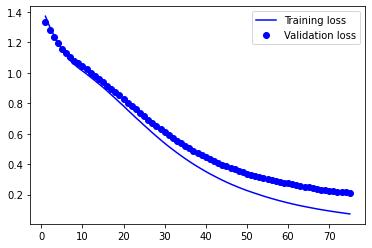

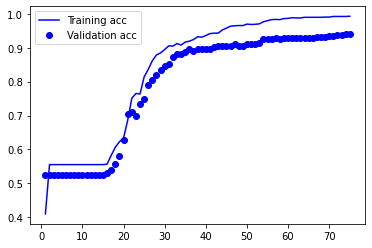

In [103]:
history = hist.history

train_loss = history['loss']
val_loss = history['val_loss']

train_acc = history['acc']
val_acc = history['val_acc']

plt.plot(range(1, EPOCHS+1), train_loss, 'b', label='Training loss')
plt.plot(range(1, EPOCHS+1), val_loss, 'bo', label='Validation loss')
plt.legend()
plt.show()

plt.plot(range(1, EPOCHS+1), train_acc, 'b', label='Training acc')
plt.plot(range(1, EPOCHS+1), val_acc, 'bo', label='Validation acc')
plt.legend()
plt.show()

In [104]:
model.evaluate(x_test, y_test)

24/24 [==============================] - 0s 564us/step - loss: 0.2041 - acc: 0.9474


[0.20414216816425323, 0.9473684430122375]

In [105]:
predictions = model.predict(x_test)

In [106]:
reverse_word_index = dict([(index, word) for (word, index) in word_index.items()])

In [107]:
# prediction 0
pred = predictions[0]
print('Predicted label: {}'.format(np.argmax(pred)))

message = ' '.join([reverse_word_index.get(w, '') for w in x_test[0].tolist()])
message.strip()

Predicted label: 0


'selamat anda terpilih sebagai pemenang kedua kode pin hadiah anda fdd info klik bit hadiah ramadhan'

In [108]:
# prediction 50
pred = predictions[50]
print('Predicted label: {}'.format(np.argmax(pred)))

message = ' '.join([reverse_word_index.get(w, '') for w in x_test[50].tolist()])
message.strip()

Predicted label: 1


'info dari pusat game bahwa akun bos istanataipan com sedang bagus boleh coba bermain siang hari ini winrate tinggi kartu bersahabat salam hoki'

In [109]:
# prediction 80
pred = predictions[80]
print('Predicted label: {}'.format(np.argmax(pred)))

message = ' '.join([reverse_word_index.get(w, '') for w in x_test[80].tolist()])
message.strip()

Predicted label: 0


'selamat anda meraih hadiah juta dri shopee indonesia info klik www thr shopee blogspot com'

In [110]:
# prediction last
pred = predictions[-1]
print('Predicted label: {}'.format(np.argmax(pred)))

message = ' '.join([reverse_word_index.get(w, '') for w in x_test[-1].tolist()])
message.strip()

Predicted label: 0


'riki apa kaba kangen sama kaamu chat com'

In [111]:
predictions[-1]

array([0.82250816, 0.02432367, 0.05891695, 0.09425117], dtype=float32)